In [1]:
# 선형회귀분석
# - 하나 혹은 그 이상의 독립변수가 종속변수에 미치는 형향을 추정(예측)

In [2]:
# sklearn.linear_model.LinearRegression()
# 파라미터
# x: 학습 데이터
# y: 목푯값

In [3]:
# sklearn.linear_model
# 클래스
# 릿지 회귀
# alpha: 규제 강도를 제어하는 L2항에 곱하는 상수(defalt = 1.0)
# 라쏘 회귀
# alpha: 규제 강도를 제어하는 L1항에 곱하는 상수(defalt = 1.0)

In [4]:
# 공부 시간에 따른 시험 점수를 예측하는 모형
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('./data/P2_C2_01_linearregression.csv')

In [5]:
# 단순 선형회귀 분석
dataset.head()

,hour,score
0,0.4,5
1,0.6,10
2,1.9,12
3,1.7,14
4,2.8,30


In [6]:
print(dataset.shape,type(dataset))

(24, 2) <class 'pandas.core.frame.DataFrame'>


In [7]:
X = dataset.iloc[:,:-1]
print(type(X))
print(X.shape,'\n',X.head(5))

<class 'pandas.core.frame.DataFrame'>
(24, 1) 
    hour
0   0.4
1   0.6
2   1.9
3   1.7
4   2.8


In [8]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
# print(X,y)
print(type(X),type(y))
print(X.shape,'\n',X[:5])
print(y.shape,'\n',y[:5])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(24, 1) 
 [[0.4]
 [0.6]
 [1.9]
 [1.7]
 [2.8]]
(24,) 
 [ 5 10 12 14 30]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2, random_state=1234)

In [10]:
X[:5],len(X)

(array([[0.4],
        [0.6],
        [1.9],
        [1.7],
        [2.8]]),
 24)

In [11]:
X_train[:5],len(X_train)

(array([[7.2],
        [2.9],
        [2.8],
        [0.4],
        [3.8]]),
 19)

In [12]:
X_test[:5],len(X_test)

(array([[3.5],
        [6.2],
        [1.9],
        [1.7],
        [0.6]]),
 5)

In [13]:
y,len(y)

(array([  5,  10,  12,  14,  30,  20,  30,  42,  38,  48,  55,  58,  60,
         72,  62,  68,  72,  58,  76,  86,  90,  97,  98, 100], dtype=int64),
 24)

In [14]:
y_train[:5],len(y_train)

(array([76, 20, 30,  5, 38], dtype=int64), 19)

In [15]:
y_test[:5],len(y_test)

(array([42, 72, 12, 14, 10], dtype=int64), 5)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 객체 생성
model.fit(X_train,y_train) # 모형에 데이터를 적합(훈련시키는 과정이기 때문에 train 데이터 적)

LinearRegression()

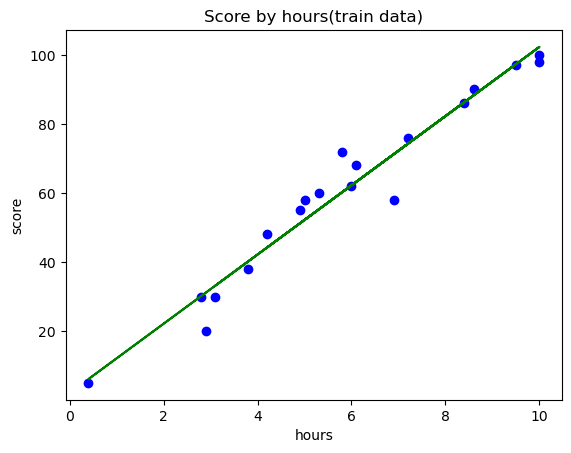

In [17]:
# 훈련 데이터 시각화
plt.scatter(X_train,y_train,color='blue')
plt.plot(X_train,model.predict(X_train), color='green') # 모
plt.title('Score by hours(train data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

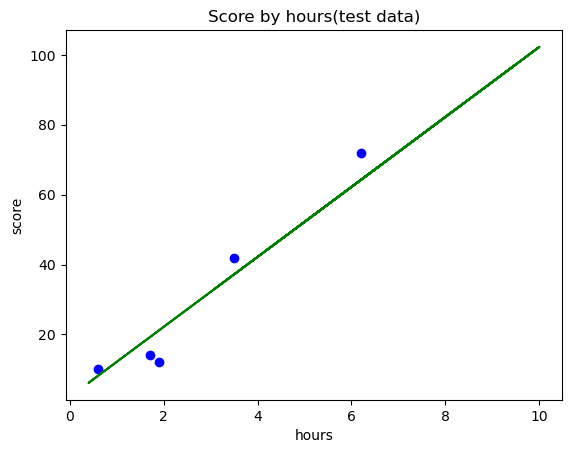

In [18]:
# 평가 데이터 시각화
plt.scatter(X_test,y_test, color = 'blue')
plt.plot(X_train,model.predict(X_train),color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [19]:
print('6시간 공부했을 때 예상 점수: ',model.predict([[6]])) # 2차원의 독립변수

6시간 공부했을 때 예상 점수:  [62.21350273]


In [20]:
# 회귀 계수, 매게 변수
# y = 10.018*x + 2.104
model.coef_

array([10.01824252])

In [21]:
# 상수, 절편
model.intercept_

2.1040476345947

In [22]:
y_pred = model.predict(X_test) # 실제답 : y_test
y_pred

array([37.16789644, 64.21715123, 21.13870841, 19.13505991,  8.11499314])

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [24]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
mape = mean_absolute_percentage_error(y_test,y_pred)
print(mse,mae,mape)

39.47200848482507 5.754745502628227 0.30799898406531423


In [25]:
# 결정계수 : 1에 가까울수록 모형이 데이터를 잘 설명
model.score(X_test,y_test)

0.9316620351717018

In [26]:
from sklearn.datasets import load_diabetes
import pandas as pd
diabetes = load_diabetes()
data = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 객체 생성
target = diabetes.target # 종속변수
print(type(target),target[:5])
print(type(data),data.head(5))
X = data # 독립 변수
y = target # 종속 변수
model.fit(X,y)

<class 'numpy.ndarray'> [151.  75. 141. 206. 135.]
<class 'pandas.core.frame.DataFrame'>         age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


LinearRegression()

In [28]:
# y = -10.0098x1 - 239.81564x2 ... + 152.133
print(model.coef_)
print(model.intercept_)

[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
  476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]
152.13348416289597


In [29]:
# 결정 계수
model.score(X,y)

0.5177484222203498

In [30]:
# 로지스틱 회귀분석
# sklearn.linear_model.LogisticRegression()
# - 종속변수가 범주형 데이터일 때 수행하는 회귀분석(분류)
# sklearn.linear_model.LogisticRegression()
# penalty : 'none' : 규제항 추가하지 않음,
#           'L2' : L2 규제항 추가(defalt),
#           'L1' : L1 규제항 추가
# C 규제강도(defalt = 1.0) : 적을수록 규제가 강함
# multi_class : 'auto' : 종속변수의 레이블에 따라 자동으로 선택
#               'ovr' : 이진 분류
#               'multinomail' : 다지분류
# max_iter : 수렴할 때까지 걸리는 최대 반복 횟수(default = 100)

In [31]:
# 다지분류
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
iris = load_iris()

In [32]:
# stratify : 층화 추출
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.2, random_state = 1234, stratify = iris.target)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [33]:
model_1 = LogisticRegression(C = 0.05, max_iter = 100)
model_glm_1 = model_1.fit(X_train,y_train)

In [34]:
model_2 = LogisticRegression()
model_glm_2 = model_2.fit(X_train,y_train)

In [35]:
from sklearn.metrics import f1_score
y_pred_1 = model_glm_1.predict(X_test) # y_test(실제값), y_pred(예측값) => 평가
y_pred_2 = model_glm_2.predict(X_test)

In [36]:
# 다지분류 macro F1-score
macro_f1_1 = f1_score(y_test,y_pred_1,average = 'macro')
macro_f1_2 = f1_score(y_test,y_pred_2,average = 'macro')
print(macro_f1_1,macro_f1_2)

0.8653198653198654 0.9333333333333332
